In [1]:
# sorgt dafür, dass, wenn die letzte Zeile eine Zuweisung ist, deren Ergebnis auch ausgegeben wird
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import copy

def show_book(figname, saveandshow=True, printflag=True, **kwargs):
    """
    Diese Funktion dient dazu Abbildungen abzuspeichern und den Name der Abbildung
    mit in den Quelltextschnipsel einzufügen
    """
    if printflag:
        print(r"Siehe Abbildung §\ref{fig_XXX}§".replace("XXX", figname))
    if saveandshow:
        plt.savefig(f"{figname}_snip.pdf",**kwargs)
        plt.show()
    
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 18


plt.rcParams['figure.subplot.left'] = .13

# Bisherige Plot-Einstellungen speichern (echte Kopie anlegen)
orig_plt_rcParams = copy.deepcopy(plt.rcParams)

# Plot-Einstellungen anpassen für zwei Grafiken nebeneinander
plt.rcParams['font.size'] = 18

plt.rcParams['figure.subplot.bottom'] = .265
plt.rcParams['figure.subplot.left'] = .09
plt.rcParams['figure.subplot.top'] = .995
plt.rcParams['figure.subplot.right'] = .995

plt.rcParams['figure.subplot.hspace'] = .3 # horizontalen Abstand anpassen


double_plt_rcParams = copy.deepcopy(plt.rcParams)
pass

`begin cmath1`

In [3]:
# Komplexe Zahl anlegen
z = 8 + 2j

(8+2j)

In [4]:
type(z)

complex

In [5]:

# geht auch ohne Realteil und mit float als Imaginärteil
z = 5.9j

5.9j

In [6]:

# j alleine geht nicht (steht für einen normalen Variablennamen)
#!j
print("NameError: name 'j' is not defined") #!

NameError: name 'j' is not defined


`end cmath1`

`begin cmath2`

In [7]:
z.real, z.imag

(0.0, 5.9)

In [8]:
type(z.real), type(z.imag)

(float, float)

In [9]:
#_
#!z.real = 0
#!#-> AttributeError: readonly attribute

`end cmath2`

`begin cmath3`

In [10]:
import cmath

In [11]:
#_
# Betrag und Phase bestimmen (als 2-Tupel)
cmath.polar(3 + 4j)

(5.0, 0.9272952180016122)

In [12]:
#_
# Phase allein
phi = cmath.phase(10 + 10j)

0.7853981633974483

In [13]:
phi/cmath.pi

0.25

`end cmath3`

In [14]:
import numpy as np

`begin cnp1`

In [15]:
zz = np.array([1, 1j, 1+1j, -1+1j])

array([ 1.+0.j,  0.+1.j,  1.+1.j, -1.+1.j])

In [16]:
zz.dtype

dtype('complex128')

In [17]:
# Datentyp hat 128 Bit weil er sich aus
# zwei 64 Bit float-Objekten zusammensetzt

In [18]:
np.real(zz)
zz.real

array([ 1.,  0.,  1., -1.])

In [19]:
np.imag(zz)
zz.imag

array([0., 1., 1., 1.])

In [20]:
np.abs(zz)

array([1.        , 1.        , 1.41421356, 1.41421356])

In [21]:
np.angle(zz)

array([0.        , 1.57079633, 0.78539816, 2.35619449])

In [22]:
np.angle(zz)/np.pi

array([0.  , 0.5 , 0.25, 0.75])

`end cnp1`

Beispiel: Komplexer Spannungsteiler

`begin cnp2`

In [23]:
# Größen mit Einheiten
U0 = 10 # Volt
omega = 50*2*np.pi # Sekunde**-1
R = 100 # Ohm
L = 0.1 # Henry

# Realteil und Imaginärteil
U1 = R/(R + 1j*omega*L)*U0

(9.101698376462753-2.859382875468554j)

In [24]:
#_
# Betrag
np.abs(U1)

9.540282163784651

In [25]:
# Phase (bzw. Phasenverschiebung) in Grad umgerechnet
np.angle(U1)*180/np.pi

-17.440594490511877

`end cnp2`

`begin cnp3`

In [26]:
# U1 für viele Werte berechnen
oomega = np.logspace(-2, 5, 1000) # 1000 Werte in [1e-2, 1e4]
UU1 = R/(R + 1j*oomega*L)*U0
pass #!

In [27]:
# grafische Darstellung. Details siehe Kapitel 7
from matplotlib import pyplot as plt

Siehe Abbildung §\ref{fig_ortskurve_rc}§


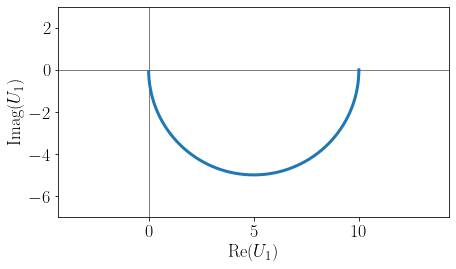

In [28]:
# im Buch ausgeblendet: Grafik-Verbesserungen #!
plt.axis("equal") #!
plt.plot([-10, 20], [0, 0], "k-", linewidth=0.5) # reele Achse #!
plt.plot([0, 0], [-20, 20], "k-", linewidth=0.5) # imag. Achse #!
plt.axis([-1, 11, -7, 3]) #!
plt.xlabel("$\mathrm{Re}(U_1)$") #!
plt.ylabel("$\mathrm{Imag}(U_1)$") #!
# #!
plt.plot(np.real(UU1), np.imag(UU1), lw=3)
show_book("ortskurve_rc", bbox_inches="tight") #!

`end cnp3`

`begin cnp4`

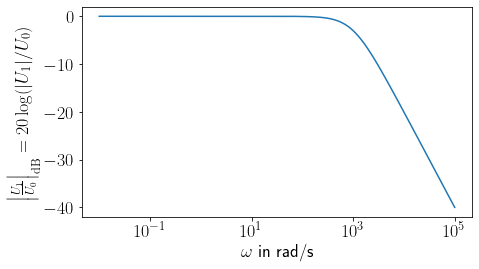

In [29]:
UU1_abs = np.abs(UU1)

plt.semilogx(oomega, 20*np.log10(UU1_abs/U0))
plt.ylabel(r"$\left|\frac{U_1}{U_0}\right|_{\mathrm{dB}} = 20 \log (|U_1|/U_0)$") #!
plt.xlabel(r"$\omega$ in rad/s") #!
show_book("bode_betrag_rc", printflag=False, bbox_inches="tight") #!

Siehe Abbildung §\ref{fig_bode_phase_rc}§


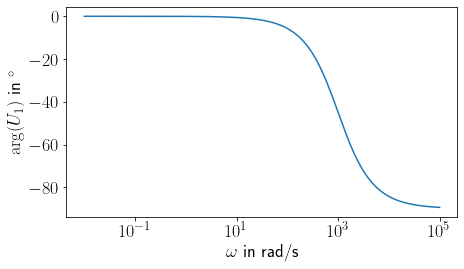

In [30]:
UU1_phase = np.angle(UU1)

plt.semilogx(oomega, UU1_phase/np.pi*180)
plt.ylabel(r"$\arg (U_1)$ in ${}^\circ$") #!
plt.xlabel(r"$\omega$ in rad/s") #!
show_book("bode_phase_rc", bbox_inches="tight") #!

`end cnp4`

In [31]:
# Motivation für logspace

np.linspace(1e-2, 1e4, 1000)[:4]

array([1.000e-02, 1.002e+01, 2.003e+01, 3.004e+01])

`begin lgs1`

In [32]:
A = np.array([[1, 1], [0.05, .001]])

array([[1.   , 1.   ],
       [0.05 , 0.001]])

In [33]:
bb = np.array([100, 3])

array([100,   3])

In [34]:
xx = np.linalg.solve(A, bb)

array([59.18367347, 40.81632653])

`end lgs1`

In [35]:
# reproduzierbare Ergebnisse bewirken
np.random.seed(10)

`begin lgs2a`

In [36]:
n = 1000
A2 = np.random.rand(n, n)
bb2 = np.random.rand(n)
pass #!
#_

In [37]:
#!%%timeit
# empfehlenswert (schnell)
xx2_1 = np.linalg.solve(A2, bb2)
# #!
# timeit-Meldung hart kodieren, für Reproduzierbarkeit der Schnipsel unabhängig vom ausführenden Rechner #!
print("46.4 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)") #!

46.4 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
#_

In [39]:
#!%%timeit
# nicht empfehlenswert (langsam, speicherintensiv)
A2inv = np.linalg.inv(A2)
xx2_2 = A2inv@bb2
# timeit-Meldung hart kodieren, wie oben #!
print("143 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)") #!

143 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


`end lgs2a`

In [40]:
%%timeit

# 1. echte Zeitmessung zum Vergleich (außerhalb des Buch-Schnipsels)

# empfehlenswert (schnell)
xx2_1 = np.linalg.solve(A2, bb2)

43.4 ms ± 3.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
%%timeit

# 2. echte Zeitmessung zum Vergleich (außerhalb des Buch-Schnipsels)

# nicht empfehlenswert (langsam, speicherintensiv)
A2inv = np.linalg.inv(A2)
xx2_2 = A2inv@bb2

166 ms ± 43.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
# Weil in timeit-Zellen die Zuweisungen nicht gespeichert werden: Wiederholung der entsprechenden Rechnungen

xx2_1 = np.linalg.solve(A2, bb2)

A2inv = np.linalg.inv(A2)
xx2_2 = A2inv@bb2
pass

`begin lgs3`

In [43]:
# Probe: Summe der quadratischen Fehler berechenen

np.sum((A2@xx2_1 - bb2)**2)

2.515770433974385e-22

In [44]:
np.sum((A2@xx2_2 - bb2)**2)

6.7460736303363365e-22

`end lgs3`

`begin lgs4`

In [45]:
A = np.array([[0.1, 0.1], [0.16, 0.08]])
bb = np.array([5, 5])
xx = np.linalg.solve(A, bb)

array([12.5, 37.5])

`end lgs4`

`begin lgs5`

In [46]:
# np.row_stack "stapelt" Zeilen übereinander
# hier: 2. Zeile von A und eine neue Zeile
A2 = np.row_stack((A[1:, :], [0.48, 0.24]))

array([[0.16, 0.08],
       [0.48, 0.24]])

In [47]:
bb2 = np.array([bb[1], 15])

array([ 5, 15])

In [48]:

#!np.linalg.solve(A2, bb2)
print("LinAlgError: Singular matrix") #!

LinAlgError: Singular matrix


`end lgs5`

In [49]:
# Nebenrechungen (nicht ins Buch)

# Nominalwerte bei 450 K (Faktor 8 bei R1)

U = 10
I = U/(np.array([8, 1])@xx)

0.07* np.array([8, 1])@xx

9.625000000000002

Das folgende Beispiel erzeugt (ohne weitere Maßname) aktuell (numpy version '1.19.1') eine FutureWarning, weil sich in der nächsten Version das Standard-Verhlaten des optionalen dritten Arguments von `np.linalg.lstsq` ändert. Dieses Argument spezifiziert eine Schwelle unterhalb derer kleine Singulärwerte der Koeffizientenmatrix als Null aufgefasst werden. Durch die folgende Zelle wird das neue Verhalten erreicht, ohne dass das im Buch-Beispiel explizit sichtbar ist (und Erklärungsbedarf verursacht).

In [50]:
import importlib
importlib.reload(np.linalg)
from numpy.linalg import lstsq as original_lstsq

def new_lstsq(A, b):
    return original_lstsq(A, b, rcond=None)

np.linalg.lstsq = new_lstsq

`begin lgs6`

In [51]:
# komplette Koeff.-Matrix A
Acompl = np.array([[0.1, 0.1],
                   [0.16, 0.08],
                   [0.48, 0.24],
                   [0.56, 0.07]])
# kompletter Vektor für rechte Seite b
bbcompl = np.array([5, 5, 15, 10])

# erstmal nur regulären Fall betrachten
# (Zeilen-Indizes 0 bis 1):
res = np.linalg.lstsq(Acompl[:2, :], bbcompl[:2])

(array([12.5, 37.5]),
 array([], dtype=float64),
 2,
 array([0.22525238, 0.03551572]))

In [52]:
xx1 = res[0]

array([12.5, 37.5])

`end lgs6`

`begin lgs7`

In [53]:
# singulärer Fall (Zeilen-Indizes 1 bis 2):
res = np.linalg.lstsq(Acompl[1:3, :], bbcompl[1:3])

(array([25. , 12.5]),
 array([], dtype=float64),
 1,
 array([5.65685425e-01, 2.48253415e-17]))

In [54]:
#_
# Probe:
xx2 = res[0]

array([25. , 12.5])

In [55]:
Acompl[1:3, :]@xx2

array([ 5., 15.])

In [56]:
# -> die 2. und 3. Gleichungen sind durch xx2 erfüllt

`end lgs7`

In [57]:
# Exemplarischer Test, ob |xx2| wirklich kleiner ist als von anderen Lösungen:
sum(xx2**2), sum(xx**2), 

(781.2499999999998, 1562.5)

`begin lgs8`

In [58]:
# überbestimmtes Gleichungssystem (Alle Zeilen, Indizes 0 bis 3):
res = np.linalg.lstsq(Acompl, bbcompl)

(array([13.33161207, 35.96499798]),
 array([0.00628027]),
 2,
 array([0.79747503, 0.15011189]))

In [59]:
#_
# Probe
xx3 = res[0]

array([13.33161207, 35.96499798])

In [60]:
Acompl@xx3

array([ 4.92966101,  5.01025777, 15.03077331,  9.98325262])

In [61]:

# Array für die Fehler in den einzelnen Gleichungen
err = Acompl@xx3 -bbcompl

array([-0.07033899,  0.01025777,  0.03077331, -0.01674738])

In [62]:

# Summe der Fehlerquadrate, siehe res[1]
sum(err**2)

0.006280267399829676

`end lgs8`

`begin eig1`

In [63]:
A = np.arange(9).reshape(3, 3)**2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

In [64]:
np.linalg.eigvals(A)

array([84.17503728,  0.54379577, -4.71883304])

`end eig1`

`begin eig2`

In [65]:
res = np.linalg.eig(A)
len(res)

2

In [66]:

# Eigenwerte
llambda = res[0]

array([84.17503728,  0.54379577, -4.71883304])

In [67]:

# Eigenvektoren
vv = res[1]

array([[-0.04861516, -0.57380308, -0.43199383],
       [-0.34952861,  0.77278599, -0.61184774],
       [-0.93566357, -0.27120442,  0.66258862]])

`end eig2`

`begin eig3`

In [68]:
# Probe ob Eigenwertgleichung erfüllt ist
A@vv[:, 0] - llambda[0]*vv[:, 0]

array([9.76996262e-15, 0.00000000e+00, 5.68434189e-14])

In [69]:

A@vv[:, 1] - llambda[1]*vv[:, 1]

array([-9.99200722e-16, -9.43689571e-16,  5.49560397e-15])

In [70]:

A@vv[:, 2] - llambda[2]*vv[:, 2]

array([-8.88178420e-16,  3.99680289e-15, -8.88178420e-15])

`end eig3`

`begin eig4`

In [71]:
# regulärer Fall (Zeilenindizes 0, 1)
np.linalg.eigvals(Acompl[0:2, :])

array([ 0.21688578, -0.03688578])

In [72]:

# singulärer Fall (Zeilenindizes 1, 2)
np.linalg.eigvals(Acompl[1:3, :])

array([0. , 0.4])

`end eig4`

In [73]:
orig_prec = np.get_printoptions() #!
np.set_printoptions(precision=5) #!

`begin eig5`

In [74]:
res = np.linalg.svd(Acompl)
len(res)

3

In [75]:
UU, ssigma, VVT = res

In [76]:
UU

array([[-0.15751, -0.43289, -0.70245, -0.54256],
       [-0.2216 , -0.18476, -0.47747,  0.82993],
       [-0.66481, -0.55429,  0.50062, -0.0129 ],
       [-0.69578,  0.68646, -0.16725, -0.12918]])

In [77]:
UU@UU.T

array([[ 1.00000e+00,  5.55112e-17,  5.89806e-17, -5.55112e-17],
       [ 5.55112e-17,  1.00000e+00,  3.29597e-17,  1.38778e-17],
       [ 5.89806e-17,  3.29597e-17,  1.00000e+00,  1.17528e-16],
       [-5.55112e-17,  1.38778e-17,  1.17528e-16,  1.00000e+00]])

In [78]:
ssigma

array([0.79748, 0.15011])

In [79]:
VVT@VVT.T

array([[1., 0.],
       [0., 1.]])

`end eig5`

`begin svd1b`

In [80]:
#!UU@ssigma@VVT
print("ValueError: [...] mismatch in its core dimension [...]") #!

ValueError: [...] mismatch in its core dimension [...]


`end svd1b`

`begin svd1c`

In [81]:
UU@np.diag([*ssigma, 0, 0])[:, :2]@VVT

array([[0.1 , 0.1 ],
       [0.16, 0.08],
       [0.48, 0.24],
       [0.56, 0.07]])

`end svd1c`

### SVD-Beispiel
- 5 verschiedene Temperatursensoren, 8 Messungen,
- welche sind relevant und welche linear abhänig
- nur 3 unabhängige Größen: $\alpha_j$

In [82]:
# Datenkonstruktion:
N = 20
sigma = np.array([10, 4, 3, 0.5, 0.3, 0.1]+[0]*N)[:N]


array([10. ,  4. ,  3. ,  0.5,  0.3,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [83]:
np.set_printoptions(precision=3)

In [84]:
np.random.seed(1747)

# Wahre (versteckte) Größen

aalpha = np.round(np.random.rand(2, 8)*50 + 350*0, 1)

array([[ 6.5, 25.1,  6.4, 21.3, 23.5, 40.3, 20.9,  9.5],
       [44.5,  3.8, 26.4, 22.1, 49.8, 21.1, 45.6, 44.1]])

In [85]:
# Verteilungsmatrix: wie hängen die Sensormesswerte von den wahren Größen ab
M = np.round(np.random.rand(5, 2), 1)

array([[0.9, 0.4],
       [0.3, 0.9],
       [0.5, 0.3],
       [0.8, 0.4],
       [0.3, 0.2]])

In [86]:
DD = (M@aalpha)

array([[23.65, 24.11, 16.32, 28.01, 41.07, 44.71, 37.05, 26.19],
       [42.  , 10.95, 25.68, 26.28, 51.87, 31.08, 47.31, 42.54],
       [16.6 , 13.69, 11.12, 17.28, 26.69, 26.48, 24.13, 17.98],
       [23.  , 21.6 , 15.68, 25.88, 38.72, 40.68, 34.96, 25.24],
       [10.85,  8.29,  7.2 , 10.81, 17.01, 16.31, 15.39, 11.67]])

`begin svd2`

In [87]:
DD.shape

(5, 8)

In [88]:
DD

array([[23.65, 24.11, 16.32, 28.01, 41.07, 44.71, 37.05, 26.19],
       [42.  , 10.95, 25.68, 26.28, 51.87, 31.08, 47.31, 42.54],
       [16.6 , 13.69, 11.12, 17.28, 26.69, 26.48, 24.13, 17.98],
       [23.  , 21.6 , 15.68, 25.88, 38.72, 40.68, 34.96, 25.24],
       [10.85,  8.29,  7.2 , 10.81, 17.01, 16.31, 15.39, 11.67]])

`end svd2`

In [89]:
np.set_printoptions(precision=3)

`begin svd3`

In [90]:
UU, ssigma, VVT = np.linalg.svd(DD)
ssigma

array([1.721e+02, 2.609e+01, 1.279e-14, 6.490e-15, 1.726e-15])

`end svd3`

`begin svd4`

In [91]:
UU1 = UU[:, :2]
Ssigma1 = np.diag(ssigma[:2])
VV1T = VVT[:2, :]

UU1@Ssigma1@VV1T

array([[23.65, 24.11, 16.32, 28.01, 41.07, 44.71, 37.05, 26.19],
       [42.  , 10.95, 25.68, 26.28, 51.87, 31.08, 47.31, 42.54],
       [16.6 , 13.69, 11.12, 17.28, 26.69, 26.48, 24.13, 17.98],
       [23.  , 21.6 , 15.68, 25.88, 38.72, 40.68, 34.96, 25.24],
       [10.85,  8.29,  7.2 , 10.81, 17.01, 16.31, 15.39, 11.67]])

In [92]:
# maximale Differenz zu den Originaldaten
np.max(np.abs(UU1@Ssigma1@VV1T - DD))

5.684341886080802e-14

`end svd4`

`begin svd5`

In [93]:
UU1a, UU1b = UU1[:2, :], UU1[2:, :]
DDa, DDb = DD[:2, :], DD[2:, :]

UU1a_inv = np.linalg.inv(UU1a)

array([[-1.165, -0.675],
       [-0.873,  0.752]])

In [94]:
UU1b@UU1a_inv@DDa

array([[16.6 , 13.69, 11.12, 17.28, 26.69, 26.48, 24.13, 17.98],
       [23.  , 21.6 , 15.68, 25.88, 38.72, 40.68, 34.96, 25.24],
       [10.85,  8.29,  7.2 , 10.81, 17.01, 16.31, 15.39, 11.67]])

In [95]:
np.max(np.abs(UU1b@UU1a_inv@DDa - DDb))

2.1316282072803006e-14

`end svd5`

`begin svd6`

In [96]:
DD = np.arange(12).reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [97]:
# Permutationsmatrix: Vertauschung
# der ersten und letzten Zeile
PP = np.array([[0, 0, 1],
               [0, 1, 0],
               [1, 0, 0]])
PP@DD

array([[ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [98]:
# Vertauschung der ersten und letzten Zeile
# durch Indizierung mit passender Liste

indices = [-1, 1, 0]
DD[indices, :]

array([[ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

`end svd6`

In [99]:
# Erzeugung der Schnipsel

!python3 /home/ck/projekte/2020_pfifd/repo/pfifd/nbsnippets.py /home/ck/projekte/2020_pfifd/repo/pfifd/code/kap_math/kapitel_mathe.ipynb

Extracting snippets in /home/ck/projekte/2020_pfifd/repo/pfifd/code/kap_math/kapitel_mathe.ipynb
Extracting snippets: cmath1, cmath2, cmath3, cnp1, cnp2, cnp3, cnp4, lgs1, lgs2a, lgs3, lgs4, lgs5, lgs6, lgs7, lgs8, eig1, eig2, eig3, eig4, eig5, svd1b, svd1c, svd2, svd3, svd4, svd5, svd6
Done
